In [2]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

#plt.style.use('Solarize_light2')
import seaborn as sns
sns.set_theme()

# Calculo  del ancho espectral mediante esplines cubicos.

In [3]:
def Delta_landa1(y_data,x_data):
    cs=CubicSpline(x_data,y_data)
    new_xdata=np.linspace(min(x_data),max(x_data),len(x_data)*10)
    Y=cs(new_xdata)
    medium_value=np.max(Y)*0.01
    M_V=[]
    wl_s=[]
    pow_s=[]
    
    for i in range(len(Y)):
        if Y[i]>medium_value:
            
            M_V.append(i)
            wl_s.append(new_xdata[i])
            pow_s.append(Y[i])
            

    x1=new_xdata[np.min(M_V)]; 
    x2=new_xdata[np.max(M_V)]
    return abs(x2-x1),wl_s,pow_s

  

In [72]:
def Delta_landa2(y_data,x_data,err):
    cs=CubicSpline(x_data,y_data)
    new_xdata=np.linspace(min(x_data),max(x_data),len(x_data)*10)
    Y=cs(new_xdata)
    medium_value=np.max(Y)-20
    M_V_d=[];M_V=[]
    
    for i in range(len(Y)):
        if abs(Y[i]-medium_value)<err:
            M_V_d.append(abs(Y[i]-medium_value))
            M_V.append(i)
    
    
    j=M_V_d.index(np.min(M_V_d)) #Indice de de valor de menor diferencia
    x1=new_xdata[M_V[j]]; y1=Y[M_V[j]] #Primer par de puntos
    del(M_V_d[j]); del(M_V[j]) #Eliminamos el punto
    
    k=M_V_d.index(min(M_V_d)) #Indice de de valor de menor diferencia nuevo
    x2=new_xdata[M_V[k]]; y2=Y[M_V[k]]#Segundo par de puntos
    DELTA_LANDA=abs(x2-x1)
    return DELTA_LANDA



 # Ejemplo

NameError: name 'Delta_landa2' is not defined

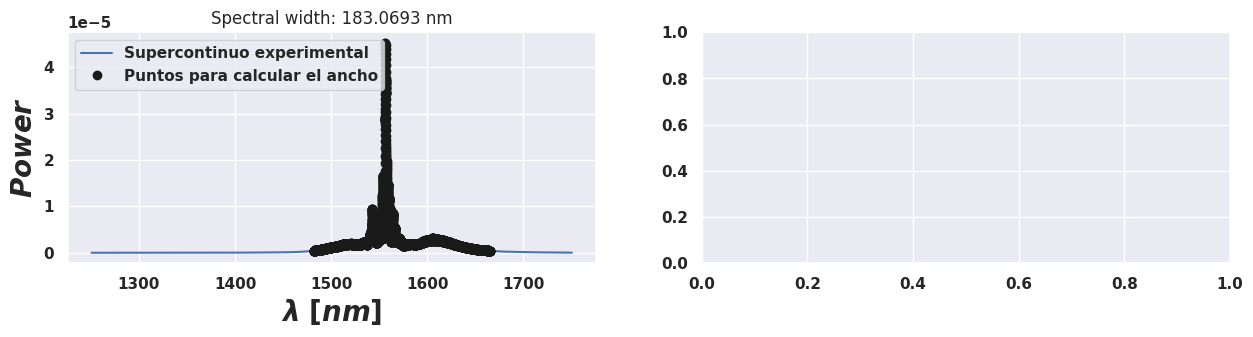

In [5]:
skip=52
path='WaveData20230210_035.csv'
df = pd.read_csv(path,skiprows=skip)
power=np.array(abs(df['Level(A)'][:]))*1e-3
#epsilon1=1e-11
#power=np.where(power>epsilon1,power,epsilon1)
WL=np.array(df['Wavelength(A)'][:])  #Wavelenght
ancho,w,p=Delta_landa1(power,WL)
fig=plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(WL,power,label='Supercontinuo experimental')
plt.plot(w,p,'ko',label='Puntos para calcular el ancho')
plt.xlabel('$\lambda$ $[nm]$',fontsize=20)
plt.ylabel('$Power$' ,fontsize=20)
plt.title('Spectral width: '+str(round(ancho,4))+' nm')
plt.legend()


plt.subplot(122)
dB_power= 10*np.log10(power/1e-3)
ancho1=Delta_landa2(dB_power,WL,0.1)
plt.plot(WL,dB_power,label='Supercontinuo experimental')
#plt.plot(w,p,'ko',label='Puntos para calcular el ancho')
plt.xlabel('$\lambda$ $[nm]$',fontsize=20)
plt.ylabel('$Power$' ,fontsize=20)
plt.title('Spectral width; Metodo 1: '+str(round(ancho,4))+' nm; Metodo 2: '+str(round(ancho1,4)))
plt.legend()


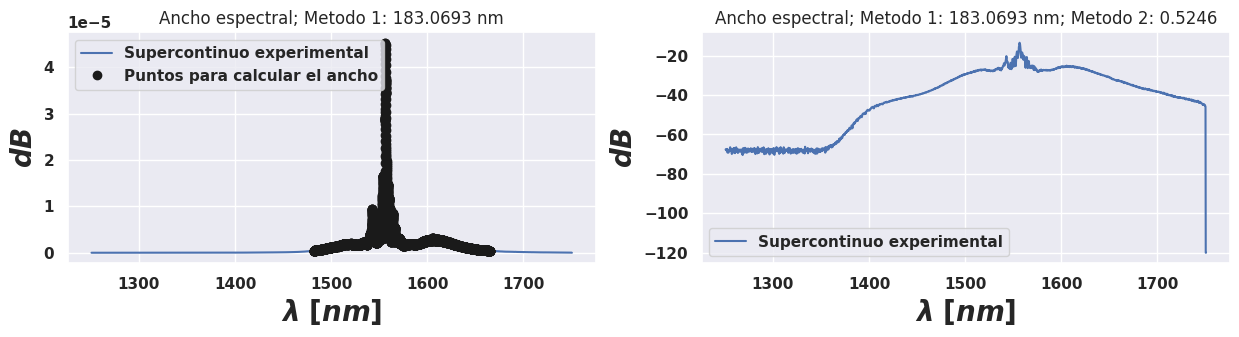

In [85]:
skip=52
path='WaveData20230210_035.csv'
df = pd.read_csv(path,skiprows=skip)
power=np.array(abs(df['Level(A)'][:]))*1e-3
#epsilon1=1e-11
#power=np.where(power>epsilon1,power,epsilon1)
WL=np.array(df['Wavelength(A)'][:])  #Wavelenght
ancho,w,p=Delta_landa1(power,WL)
fig=plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(WL,power,label='Supercontinuo experimental')
plt.plot(w,p,'ko',label='Puntos para calcular el ancho')
plt.xlabel('$\lambda$ $[nm]$',fontsize=20)
plt.ylabel('$dB$' ,fontsize=20)
plt.title('Ancho espectral; Metodo 1: '+str(round(ancho,4))+' nm')
plt.legend()


plt.subplot(122)
dB_power= 10*np.log10(power/1e-3)
ancho1=Delta_landa2(dB_power,WL,0.1)
plt.plot(WL,dB_power,label='Supercontinuo experimental')
#plt.plot(w,p,'ko',label='Puntos para calcular el ancho')
plt.xlabel('$\lambda$ $[nm]$',fontsize=20)
plt.ylabel('$dB$' ,fontsize=20)
plt.title('Ancho espectral; Metodo 1: '+str(round(ancho,4))+' nm; Metodo 2: '+str(round(ancho1,4)))
plt.legend()


In [1]:
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
from ipywidgets import interact,widgets
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d
import math
from scipy.integrate import solve_ivp
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

#plt.style.use('Solarize_light2')
import seaborn as sns
import os
#to en otra carpeta

path=os.getcwd()
sns.set_theme()

In [2]:
c = 299792458;    
def propagar_lab(path,k,skip):

    # Load File
    df = pd.read_csv(path,skiprows=skip)
    power=np.array(df['1749.9'][:])*1e-3 
    #epsilon1=1e-11
    #power=np.where(power>epsilon1,power,epsilon1)
    power=(np.sqrt(power))*k # /np.amax(power)*k  #Power
    
    WL=np.array(df['Stop'][:])  #Wavelenght

    #Sampling the simulation.
    wl=1550*1e-9 #Central wavelenght of the spectrum   
    V=np.sort(2*np.pi*c/(1e-9*WL))  #Frequencies.
    midV=(np.max(V)+np.min(V))/2

    V=V - midV# frequency grid

    fw = np.fft.fftshift(power)
    fw=fw.astype('complex')
    n = len(WL)   # number of grid points
    dT = np.pi/V[-1]
    TimeGrid =  np.arange(-n/2,n/2,1)*dT #  time grid
    #Fiber parameters
    length = 2.0             #fibre length [m]
    #betas = [beta2, beta3, ...] in units [s^2/m, s^3/m ...]
    D=-1e-12*1e9*1e-3 #Dispersion
    dD=0.006*1e-12*1e9**2*1e-3  #Dispersion slope
    beta2=-wl**2/(2*np.pi*c)*D
    beta3=(wl**2/(2*np.pi*c))**2*(2*D/wl+dD)
    betas=[beta2,beta3]
    gamma = 10*1e-3    #nonlinear coefficient [1/W/m]
    loss = 0.1e-3       #loss [1/m]
    alpha = np.log(10.**(loss/10))   #attenuation coefficient


    #Raman response
    fr = 0.29                  # fractional Raman contribution

    tau1 = 168e-15; tau2 = 1000e-15;

    #fb=popt[1] ; taub=96e-12  
    #Raman response
    #fr = popt[0]         # fractional Raman contribution
    #tau1 = popt[2]; tau2 = popt[3];
    #fb=0.21; taub=popt[4]  #fb=0.21 ; taub=96e-12 # Response function modified
    
    RT=((tau1**2+tau2**2)/(tau1*tau2**2)*np.exp(-TimeGrid/tau2)*np.sin(TimeGrid/tau1))
       #+fb*(2*taub-TimeGrid)/taub**2*np.exp(-TimeGrid/taub))# Response function
    RT[TimeGrid<0]=0
    hr=RT/np.trapz(RT, TimeGrid)
    
    B = 0

    for i in range(0,len(betas)):      #Taylor expansion of betas
        B = B + betas[i]/math.factorial(i+2)*V**(i+2)
        
    L=1j*B - alpha/2

    #Laser parameters
    WaveLength=1556e-9      #reference wavelength [m]
    w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]

    gamma = gamma/w0   
    W = V +midV
    HW =np.fft.ifft(np.fft.fftshift(hr.T))*n   # frequency domain Raman
    L=np.fft.fftshift(L) 
    W=np.fft.fftshift(W) 

    #Ecuación a integrar.
    def rhs(z,AW):
            
        AT=np.fft.fft(np.exp(L*z)*AW) #A TILDE
        IT=np.abs(AT)**2
        AA=np.fft.ifft(IT) #Fourier transform of IT
        RS= fr*np.fft.fft(HW*AA)*dT # Convolution
        M=np.fft.ifft(AT*((1-fr)*IT + RS))  #% response function
                
        return 1j*gamma*W*M*np.exp(-L*z)

    nsaves=10  # Number of points along the distance

    # Z
    z = np.linspace(0,length,nsaves)
  
    # solve ODE
    y = solve_ivp(rhs,[min(z),max(z)],fw,t_eval=z)

    for i in range(0,len(y.y[0,:])):
       # change variables, frequency solutions.
        y.y[:,i] = np.fft.fftshift(y.y[:,i]*np.exp(L.T*z[i]))*dT*n


    return y,z
   
    


def Delta_landa1(y_data,x_data):
    cs=CubicSpline(x_data,y_data)
    new_xdata=np.linspace(min(x_data),max(x_data),len(x_data)*3)
    Y=cs(new_xdata)
    medium_value=np.max(Y)*0.01
    M_V=[]
    wl_s=[]
    pow_s=[]
    
    for i in range(len(Y)):
        if Y[i]>medium_value:
            
            M_V.append(i)
            wl_s.append(new_xdata[i])
            pow_s.append(Y[i])
            

    x1=new_xdata[np.min(M_V)]; 
    x2=new_xdata[np.max(M_V)]
    return abs(x2-x1)

  

In [3]:
paths_amps=[]
paths_sc1=[]
paths_sc2=[]
ang1=[]
ang2=[]
ang3=[]
anch_s1=[]
anch_s2=[]

for i in range(0,39):
    for j in range(0,50):

        paths_amps.append('MUESTRA_'+str(0)+'_'+str(i)+'_'+str(j)+'.csv')
 


In [4]:
for filename in paths_amps:
    paths_sc1.append(filename)
    df_S= pd.read_csv(path+'/Supercontinuo_1'+'/'+filename,skiprows=27)
    power_P=np.array(df_S['1749.9'][:])*1e-3
    WL_P=np.array(df_S['Stop'][:])  #Wavelenght
    anch_s1.append(Delta_landa1(power_P,WL_P))

for filename in paths_amps:
    paths_sc2.append(filename)
    df_S= pd.read_csv(path+'/Supercontinuo_2'+'/'+filename,skiprows=27)
    power_P=np.array(df_S['1749.9'][:])*1e-3
    WL_P=np.array(df_S['Stop'][:])  #Wavelenght
    anch_s2.append(Delta_landa1(power_P,WL_P))


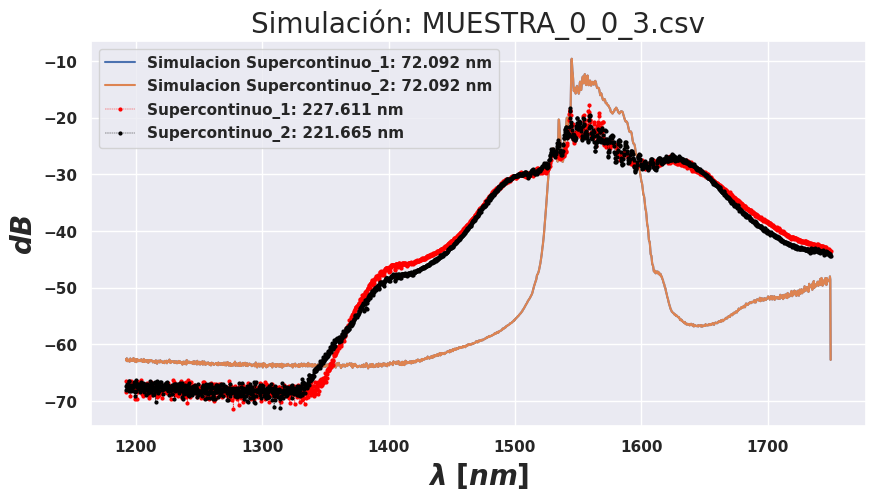

In [5]:
pulse='MUESTRA_0_0_3.csv'
#ind_amp=paths_amps.index('MUESTRA_0_0_3.csv')
#ind_sup1=paths_sc1.index('MUESTRA_0_0_3.csv')
#ind_sup2=paths_sc2.index('MUESTRA_0_0_3.csv')


df_S1= pd.read_csv(path+'/Supercontinuo_1'+'/'+pulse,skiprows=27)
power_S1=np.array(df_S1['1749.9'][:])*1e-3
WL_S1=np.array(df_S1['Stop'][:])  #Wavelenght
df_S2= pd.read_csv(path+'/Supercontinuo_2'+'/'+pulse,skiprows=27)
power_S2=np.array(df_S2['1749.9'][:])*1e-3
WL_S2=np.array(df_S2['Stop'][:])  #Wavelenght

dB_ps1=10*np.log10(power_S1/1e-3)
dB_ps2=10*np.log10(power_S2/1e-3)


fig=plt.figure(figsize=(10,5))


plt.subplot(111)
y1,z1=propagar_lab(path+'/Pulsos_amp'+'/'+pulse,1,skip=27)
In1=np.abs(y1.y.T[-1])**2
lIW1 = 10*np.log10(In1)+240 #2*np.pi*c/WL**2) # log scale spectral intensity
y2,z2=propagar_lab(path+'/Pulsos_amp'+'/'+pulse,1,skip=27)
In2=np.abs(y2.y.T[-1])**2
lIW2 = 10*np.log10(In2)+240 #2*np.pi*c/WL**2) # log scale spectral intensity
plt.plot(WL_S1,lIW1,label='Simulacion Supercontinuo_1: '+str(round(Delta_landa1(In1,WL_S1),3))+' nm')
plt.plot(WL_S1,lIW2,label='Simulacion Supercontinuo_2: '+str(round(Delta_landa1(In2,WL_S1),3))+' nm')
plt.plot(WL_S1,dB_ps1,label='Supercontinuo_1: '+str(round(Delta_landa1(power_S1,WL_S1),3))+' nm',color='red', marker='o', linestyle='dashed',linewidth=0.3, markersize=2)
plt.plot(WL_S2,dB_ps2,label= 'Supercontinuo_2: '+str(round(Delta_landa1(power_S2,WL_S1),3))+' nm', color='black', marker='o', linestyle='dashed',linewidth=0.3, markersize=2)
plt.xlabel('$\lambda$ $[nm]$',fontsize=20)
plt.title('Simulación: '+pulse,fontsize=20)
plt.ylabel('$dB$',fontsize=20)
#plt.ylim(-100,10)

plt.legend()

In [6]:
def anim2(k,m):
    f = plt.figure(figsize=(13, 4),dpi=200)
    # plot resultados
    #jojasfjas
    y,z=propagar_lab(path+'/Pulsos_amp'+'/'+pulse,k,27)
    In1=np.abs(y.y.T[-1])**2    
    lIW = 10*np.log10(In1)+m#2*np.pi*c/WL**2) # log scale spectral intensity
    
    #plt.plot(WL_s,lIW[0],label='in')
    plt.plot(WL_S2,lIW,'ro',label='Simulacion Supercontinuo_2: '+str(round(Delta_landa1(In1,WL_S1),3))+' nm')
    plt.plot(WL_S2, dB_ps2,'k',label='Supercontinuo_2 experimental: '+str(round(Delta_landa1(power_S2,WL_S2),3))+' nm',linewidth=3)
    plt.xlabel('$\lambda$ $[nm]$')
    plt.title(str(round(z[-1],3))+' [m]')
    plt.ylabel('$dB$' )
    #plt.ylim(-100,10)
    plt.legend()
    #plt.xlim(1300,1800)
   
  
   

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,         
        k= widgets.FloatSlider(min=0,max=30,value=22,step=0.01,**opc),
        m= widgets.FloatSlider(min=0,max=300,value=207,step=1,**opc)
     
        
        #mm
        );

interactive(children=(FloatSlider(value=22.0, continuous_update=False, description='k', max=30.0, readout_form…

In [8]:
simP_path2=[]

del paths_amps[0] ; del paths_amps[0] 

for i in range(len(paths_amps)):
    for j in range(len(paths_sc2)):
        if paths_amps[i]==paths_sc2[j]:
            simP_path2.append(paths_amps[i])

espec=[]
for i in simP_path2:
    y1,z1=propagar_lab(path+'/Pulsos_amp'+'/'+i,21.580,skip=27)
    In1=np.abs(y1.y.T[-1])**2
    espec.append(Delta_landa1(In1,WL_S1))



In [10]:
espec.append(200)
espec.append(200)

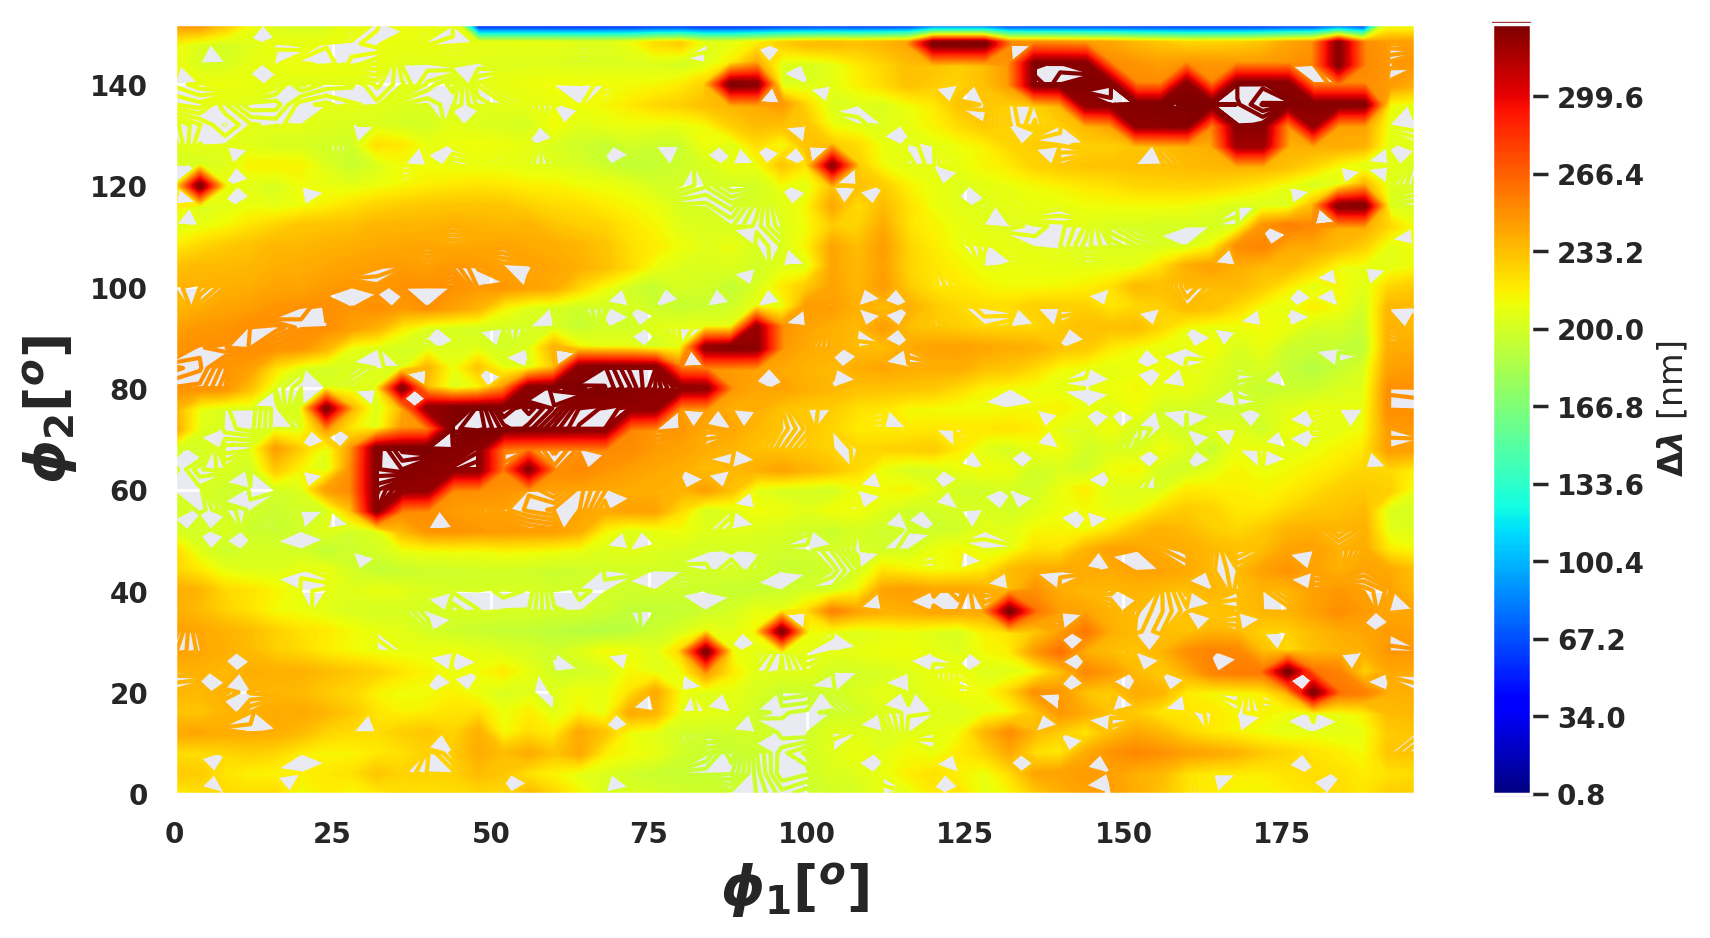

In [11]:
plt.figure(figsize=(10,5),dpi=200)
power=espec#Le llamo potencia porque así lo reciclé, ancho sería la medida plana del ancho epectral
power=np.reshape(power,(39,50)) #Las dimensiones de sus datos, yo los tengo de 39(Theta_2)*50(Thetha_1)
X=np.arange(0,4*50,4)
Y=np.arange(0,4*(39),4)
X,Y = np.meshgrid(X,Y)

plt.rcParams['figure.figsize'] = 24, 12 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

font = {'weight' : 'bold',
        'size'   : 15}


cs=plt.contour(X, Y, power,1000,cmap="jet")
plt.xlabel("$\phi_{1} [^o]$",fontsize=20)
plt.ylabel("$\phi_{2} [^o]$",fontsize=20)
plt.colorbar(cs,label="$\Delta\lambda$ [nm]")

fig.tight_layout()
